In [1]:
import torch
import numpy as np
#import scipy.io
import argparse
from pinn.neural_net import MLP
from pinn.get_points import normalize
from pinn.util import log
from pathlib import Path
import matplotlib.pyplot as plt
from pinn.evaluate import get_pars, evaluate, load_data, get_residuals, get_loss

In [2]:
def plot_surface(t,nx,ny,var,pars):

    # Define grid
    t = np.array(t)
    x = np.linspace(pars['xi'],pars['xf'],nx)
    y = np.linspace(0,pars['yf'],ny)

    [e_pred,u_pred,v_pred,t_grid,x_grid,y_grid,X] = evaluate(t,x,y,model_path)

    if var == 'e':
        Y = e_pred
    elif var == 'u':
        Y = u_pred
    elif var == 'v':
        Y = v_pred
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 8))
    ax.plot_surface(x_grid.reshape((nx,ny)), y_grid.reshape((nx,ny)), Y.reshape((nx,ny)))

    plt.show()
    #plt.savefig(f'img.png', dpi=fig.dpi)

In [3]:
def plot_contours(t,nx,ny,pars):

    # Define grid
    t = np.array(t)
    x = np.linspace(pars['xi'],pars['xf'],nx)
    y = np.linspace(0,pars['yf'],ny)

    [e_pred,u_pred,v_pred,t_grid,x_grid,y_grid,X] = evaluate(t,x,y,model_path)
    
    #fig, ax = plt.subplots(3,2,figsize=(12, 8))

    plt.subplots(3,2,figsize=(12, 8))

    plt.subplot(3,2,1)
    plt.contourf(x_grid[0],y_grid[0],e_pred[0])
    plt.colorbar()

    plt.subplot(3,2,3)
    plt.contourf(x_grid[0],y_grid[0],u_pred[0])
    plt.colorbar()

    plt.subplot(3,2,5)
    plt.contourf(x_grid[0],y_grid[0],v_pred[0])
    plt.colorbar()


    if len(data_path)>0:
        [e_data,u_data,v_data] = load_data(t,x,y,data_path)
        plt.subplot(3,2,2)
        plt.contourf(x_grid[0],y_grid[0],e_data[0])
        plt.colorbar()

        plt.subplot(3,2,4)
        plt.contourf(x_grid[0],y_grid[0],u_data[0])
        plt.colorbar()

        plt.subplot(3,2,6)
        plt.contourf(x_grid[0],y_grid[0],v_data[0])
        plt.colorbar()

    plt.show()
    #plt.savefig(f'img.png', dpi=fig.dpi)

In [4]:
def plot_residuals(t,nx,ny,pars):

    # Define grid
    t = np.array(t)
    x = np.linspace(pars['xi'],pars['xf'],nx)
    y = np.linspace(0,pars['yf'],ny)

    [e_pred,u_pred,v_pred,t_grid,x_grid,y_grid,X] = get_residuals(t,x,y,model_path)
    
    #fig, ax = plt.subplots(3,2,figsize=(12, 8))

    plt.subplots(3,2,figsize=(12, 8))

    plt.subplot(3,1,1)
    plt.contourf(x_grid[0],y_grid[0],e_pred[0])
    plt.colorbar()

    plt.subplot(3,1,2)
    plt.contourf(x_grid[0],y_grid[0],u_pred[0])
    plt.colorbar()

    plt.subplot(3,1,3)
    plt.contourf(x_grid[0],y_grid[0],v_pred[0])
    plt.colorbar()

    plt.show()
    #plt.savefig(f'img.png', dpi=fig.dpi)

In [5]:
def plot_contours_tx(nt,nx,y,pars):

    # Define grid
    t = np.linspace(0,pars['tf'],nt)
    x = np.linspace(pars['xi'],pars['xf'],nx)
    y = np.array(y)

    [e_pred,u_pred,v_pred,t_grid,x_grid,y_grid,X] = evaluate(t,x,y,model_path)
    
    #fig, ax = plt.subplots(3,2,figsize=(12, 8))

    plt.subplots(3,2,figsize=(12, 8))

    plt.subplot(3,2,1)
    plt.contourf(np.squeeze(t_grid),np.squeeze(x_grid),np.squeeze(e_pred))
    plt.colorbar()

    plt.subplot(3,2,3)
    plt.contourf(np.squeeze(t_grid),np.squeeze(x_grid),np.squeeze(u_pred))
    plt.colorbar()

    plt.subplot(3,2,5)
    plt.contourf(np.squeeze(t_grid),np.squeeze(x_grid),np.squeeze(v_pred))
    plt.colorbar()


    if len(data_path)>0:
        [e_data,u_data,v_data] = load_data(t,x,y,data_path)
        plt.subplot(3,2,2)
        plt.contourf(np.squeeze(t_grid),np.squeeze(x_grid),np.squeeze(e_data))
        plt.colorbar()

        plt.subplot(3,2,4)
        plt.contourf(np.squeeze(t_grid),np.squeeze(x_grid),np.squeeze(u_data))
        plt.colorbar()

        plt.subplot(3,2,6)
        plt.contourf(np.squeeze(t_grid),np.squeeze(x_grid),np.squeeze(v_data))
        plt.colorbar()

    plt.show()
    #plt.savefig(f'img.png', dpi=fig.dpi)

In [6]:
def plot_timeseries(nt,x,y,var,pars):

    # Define grid
    t = np.linspace(0.,pars['tf'],nt)
    x = np.array(x)
    y = np.array(y)

    [e_pred,u_pred,v_pred,t_grid,x_grid,y_grid,X] = evaluate(t,x,y,model_path)  

    if var == 'e':
        Y = e_pred
    elif var == 'u':
        Y = u_pred
    elif var == 'v':
        Y = v_pred
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(t, Y.reshape(nt))

    if len(data_path)>0:
        [e_data,u_data,v_data] = load_data(t,x,y,data_path)
        if var == 'e':
            Y_data = e_data
        elif var == 'u':
            Y_data = u_data
        elif var == 'v':
            Y_data = v_data

        ax.plot(t, Y_data.reshape(nt))

    plt.show()

In [32]:
def plot_slices(nt,nx,ny,pars):
    t = np.linspace(0,pars['tf']*(nt-1)/nt,nt)
    x = np.linspace(pars['xi'],pars['xf'],nx)
    y = np.linspace(0,pars['yf'],ny)

    [e_pred,u_pred,v_pred,t_grid,x_grid,y_grid,X] = evaluate(t,x,y,model_path)

    e_pred = np.mean(e_pred,2)
    u_pred = np.mean(u_pred,2)
    v_pred = np.max(np.abs(v_pred),2)

    plt.subplots(3,2,figsize=(12, 8))

    plt.subplot(3,2,1)
    for i in range(0,nt):
        plt.plot(x, e_pred[i,:])

    plt.subplot(3,2,3)
    for i in range(0,nt):
        plt.plot(x, u_pred[i,:])

    plt.subplot(3,2,5)
    for i in range(0,nt):
        plt.plot(x, v_pred[i,:])

    if len(data_path)>0:
        [e_data,u_data,v_data] = load_data(t,x,y,data_path)

        e_data = np.mean(e_data,2)
        u_data = np.mean(u_data,2)
        v_data = np.max(np.abs(v_data),2)

        plt.subplot(3,2,2)
        for i in range(0,nt):
            plt.plot(x, e_data[i,:])

        plt.subplot(3,2,4)
        for i in range(0,nt):
            plt.plot(x, u_data[i,:])

        plt.subplot(3,2,6)
        for i in range(0,nt):
            plt.plot(x, v_data[i,:])
    

    plt.show()
    #plt.savefig(f'img.png', dpi=fig.dpi)

IndentationError: unexpected indent (185713142.py, line 28)

In [16]:
model_path = 'models/model_nf10000_nb1000_ns0_fn1-0-0_fs0-1-1_MLPRes_2x2x30_shuffle0_seed1_adam_lr0.001.pt'
data_path = 'ref_x512_y32_SL6O3.mat'
pars = get_pars(model_path)

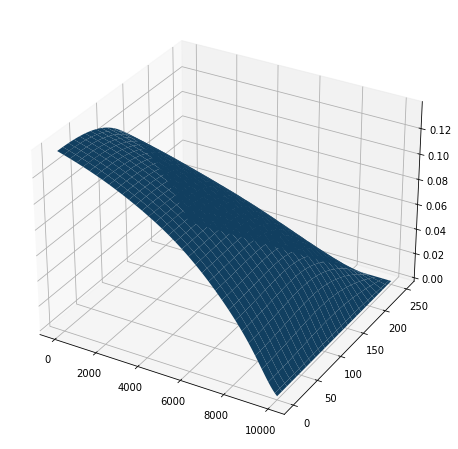

In [9]:
t = 0*3600
nx = 101
ny = 51
var = 'u'
plot_surface(t,nx,ny,var,pars)

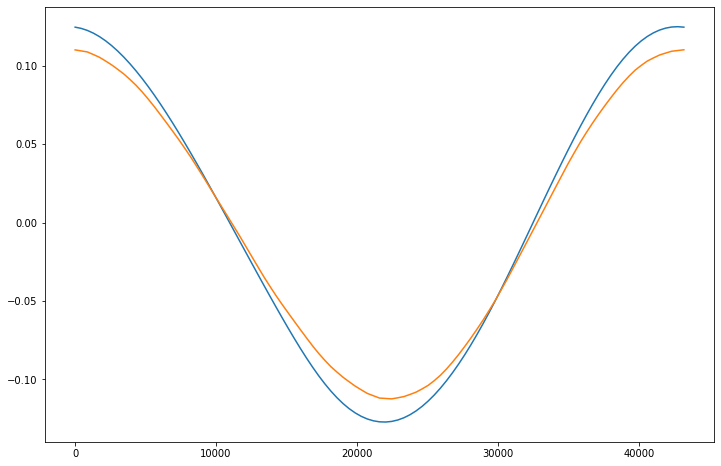

In [10]:
nt = 101
x = 0
y = 100
var = 'u'
plot_timeseries(nt,x,y,var,pars)

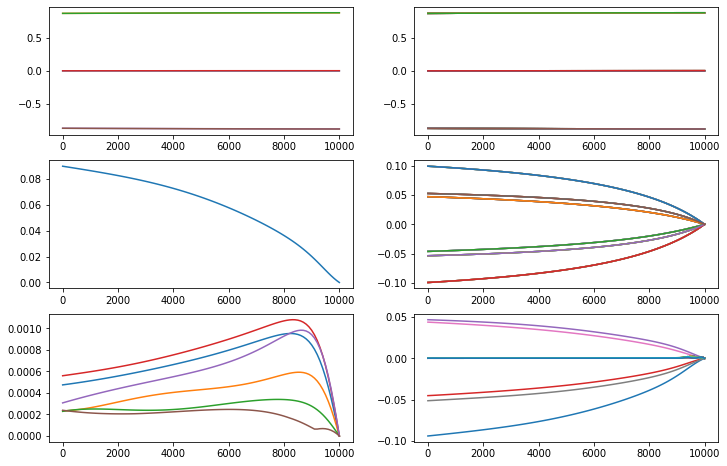

In [31]:
nt = 6
nx = 101
ny = 11

plot_slices(nt,nx,ny,pars)

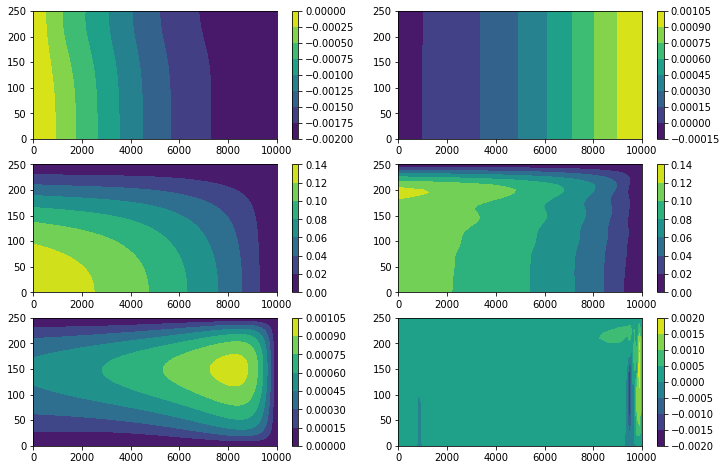

In [19]:
t = 0*3600
nx = 101
ny = 51
plot_contours(t,nx,ny,pars)

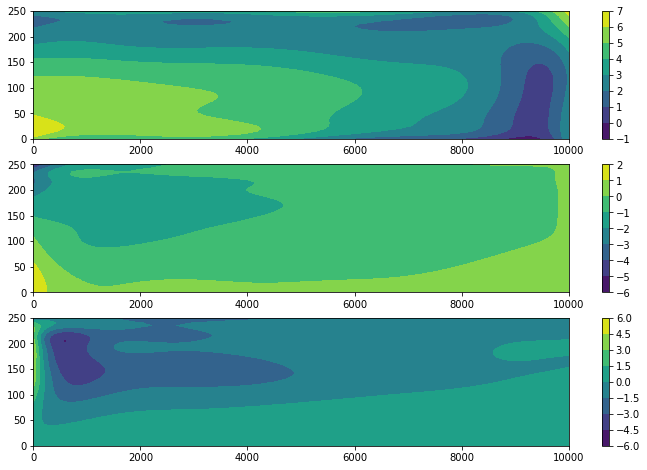

In [13]:
t = 0*3600
nx = 101
ny = 51
plot_residuals(t,nx,ny,pars)

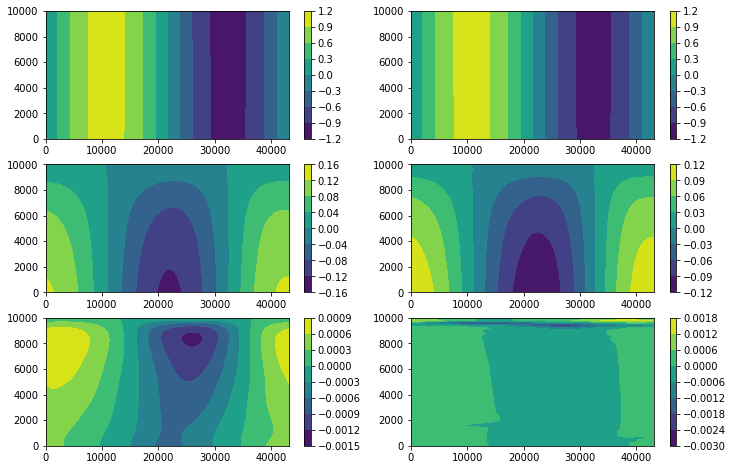

In [14]:
nt = 101
nx = 51
y = 100

plot_contours_tx(nt,nx,y,pars)

[]

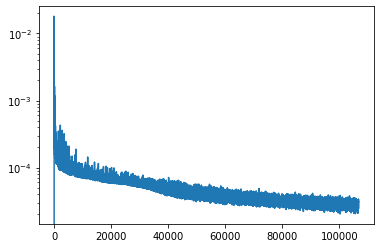

In [15]:
l = get_loss(model_path)
plt.plot(l[:,0])
plt.semilogy()
#plt.legend(['Total','R1','R2','R3','B'])